epoch 20, x1 -0.943467, x2 -0.000073


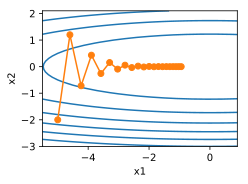

In [1]:
%matplotlib inline
import d2lzh as d2l
from mxnet import nd

eta = 0.4

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1 -0.387814, x2 -1673.365109


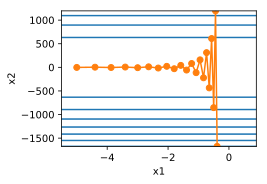

In [2]:
eta = 0.6
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1 -0.062843, x2 0.001202


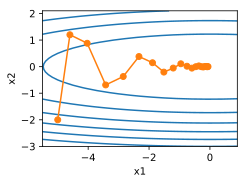

In [3]:
def momentum_2d(x1, x2, v1, v2):
    v1 = gamma * v1 + eta * 0.2 * x1
    v2 = gamma * v2 + eta *4 *x2
    return x1 - v1, x2 - v2, v1, v2
eta, gamma = 0.4, 0.5
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

epoch 20, x1 0.007188, x2 0.002553


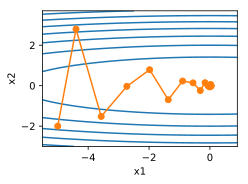

In [4]:
eta = 0.6
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))
# s动量法在竖直方向的移动更加平滑，在水平上跟接近最优解。

In [5]:
features, labels = d2l.get_data_ch7()

def init_momentum_states():
    v_w = nd.zeros((features.shape[1], 1))
    v_b = nd.zeros(1)
    return (v_w, v_b)

# 动量法，将速度变量用更广义的状态变量states表示
def sgd_momentum(params, states, hyperparams):
    for p, v in zip(params, states):
        v[:] = hyperparams['momentum'] * v + hyperparams['lr'] * p.grad
        p[:] -= v

loss: 0.244111, 0.134864 sec per epoch


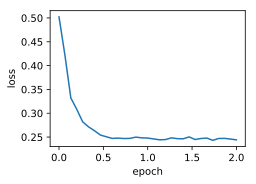

In [6]:
d2l.train_ch7(sgd_momentum, init_momentum_states(),
              {'lr': 0.02, 'momentum': 0.5}, features, labels)

loss: 0.248254, 0.137783 sec per epoch


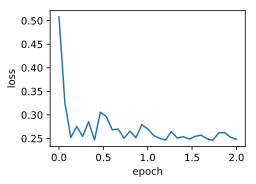

In [7]:
d2l.train_ch7(sgd_momentum, init_momentum_states(),
              {'lr': 0.02, 'momentum': 0.9}, features, labels)

loss: 0.246055, 0.139035 sec per epoch


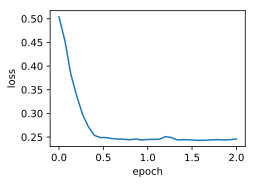

In [8]:
# 其小批量随机梯度为最近10个时间步的10倍小批量梯度的加权平均。
# 直觉上，10倍小批量梯度比2倍小批量梯度大了5倍，降低学习率至1/5
d2l.train_ch7(sgd_momentum, init_momentum_states(),
              {'lr': 0.004, 'momentum': 0.9}, features, labels)

loss: 0.244304, 0.121266 sec per epoch


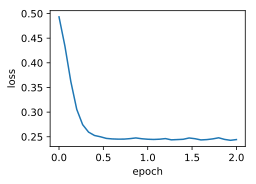

In [9]:
# 简洁实现
d2l.train_gluon_ch7('sgd', {'learning_rate': 0.004, 'momentum': 0.9},
                    features, labels)

loss: 0.289858, 0.118080 sec per epoch


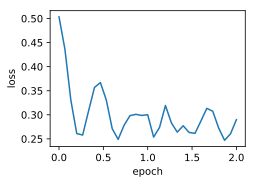

In [17]:
# 简洁实现
d2l.train_gluon_ch7('sgd', {'learning_rate': 0.004, 'momentum': 0.},
                    features, labels)